## Question 5A
Take a binary image and a structuring element to perform `Erosion` and `Dilation` operations.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

### Erosion Function

In [26]:
def erosion(image, mask):
    considered_pixel = mask.copy()
    new_image = image.copy()
    mask_x, mask_y = mask.shape
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            flag = True
            for l in range(mask_y):
                for r in range(mask_x):
                    if mask[l, r] == 0:
                        continue

                    xx = l + i - (mask_x//2)
                    yy = r + j - (mask_y//2)

                    if (xx>=0 and xx<height and yy>=0 and yy<width):
                        if image[xx, yy]==0:
                            flag = False
                
            if flag == True:
                new_image[i, j] = 255
            else:
                new_image[i, j] = 0

    return new_image.astype(np.uint8)
                    

### Dilation Function

In [27]:
def dilation(image, mask):
    considered_pixel = mask.copy()
    new_image = np.zeros(image.shape, dtype=np.uint8)
    mask_x, mask_y = mask.shape
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            flag = False
            for l in range(mask_x):
                for r in range(mask_y):
                    xx = l + i - (mask_x//2)
                    yy = r + j - (mask_y//2)
                    if (xx<0 or xx>=height or yy<0 or yy>=width):
                        continue
                    if image[xx, yy] > 0 and mask[l, r]==1:
                        flag = True
                        break 
            
            if flag:
                new_image[i, j] = 255
            flag = False
    
    return new_image

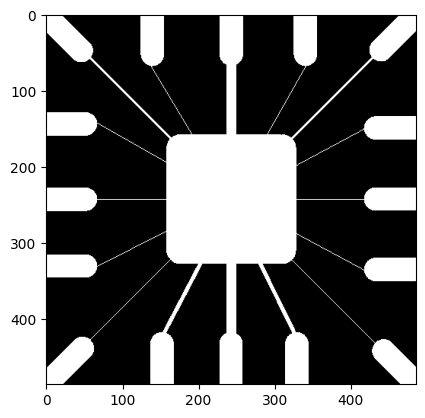

(486, 486)


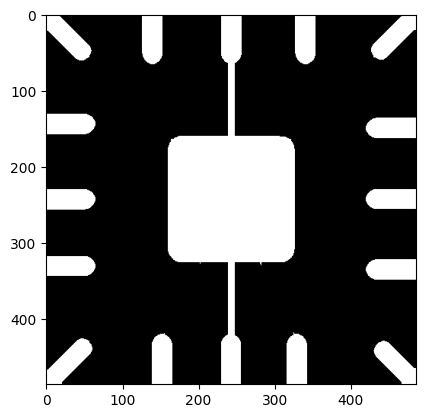

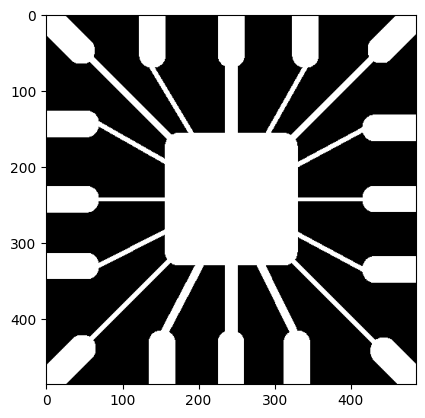

In [28]:
original_image = cv.imread('wirebond.tif', cv.IMREAD_GRAYSCALE).copy()
plt.imshow(original_image, cmap='gray')
plt.show()

print(original_image.shape)

mask = np.ones((5, 5), dtype=np.uint8)
erotedimage = erosion(original_image, mask)
plt.imshow(erotedimage, cmap='gray')
plt.show()

dialatedImage = dilation(original_image, mask)
plt.imshow(dialatedImage, cmap='gray')
plt.show()